# **Project Name**    - Yes Bank Stock Closing Price Prediction



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** SHYAMASHRI DAS
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

This project focuses on analyzing the Yes Bank's stock price dataset. Yes Bank, a prominent player in the Indian financial sector, has been in the spotlight since 2018 due to a fraud case involving Rana Kapoor. The dataset encompasses monthly stock prices since the bank's inception, including closing, opening, highest, and lowest prices for each month. The primary goal is to predict the stock's closing price for each month.

Objective:
The main objective of this project is to predict the monthly closing price of Yes Bank's stock.

To-Do List:
To achieve this objective, the project involves the following tasks:

Exploratory Data Analysis (EDA): Understanding the dataset through visualizations and statistical summaries.
Hypothesis Testing: Validating assumptions and testing hypotheses related to the dataset.
Data Manipulation and Feature Engineering: Creating new features and transforming existing ones to improve model performance.
Data Preprocessing: Cleaning the data, handling missing values, and encoding categorical variables.
Model Implementation: Building and training regression models to predict the stock's closing price.
Evaluation: Assessing the performance of the models using appropriate evaluation metrics.
Interpretation: Explaining the predictions made by the models using techniques like SHAP (SHapley Additive exPlanations).
Iteration: Iteratively refining the models and strategies based on evaluation results and insights gained from interpretation.
Through these steps, the project aims to develop a robust predictive model that accurately forecasts Yes Bank's stock closing prices, contributing valuable insights to the financial domain.








# **GitHub Link -**

https://github.com/Shyama1995

# **Problem Statement**


The problem statement is to develop an accurate and reliable forecasting model for predicting Yes Bank's stock closing prices. The model should be trained on a subset of historical data and validated on another subset to ensure its effectiveness in predicting future stock prices. The ultimate objective is to create a robust and accurate model that can assist in forecasting Yes Bank's stock closing price with precision.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

import datetime

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load Dataset
data=pd.read_csv("/content/drive/MyDrive/Regression - Yes Bank Stock Closing Price Prediction Capstone - End to End Machine Learning/data_YesBank_StockPrices.csv")

### Dataset First View

In [ ]:
# Dataset First Look
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Text(0.5, 1.0, 'Visualizing the missing values')

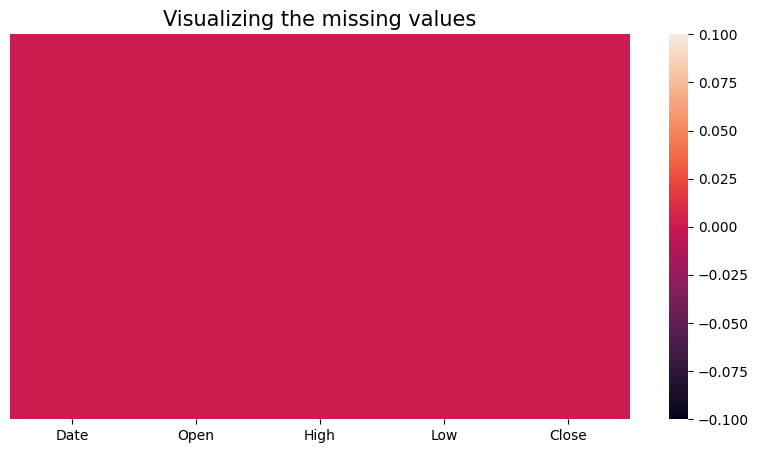

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize = (10,5))
sns.heatmap(data.isnull(), cbar=True, annot=False, yticklabels=False)
plt.title('Visualizing the missing values', fontsize = 15)

### What did you know about your dataset?

According to the analysis above, the dataset comprises 5 columns and 185 rows. where just one column is in float format and the others are formatted as dates. This data does not contain any Null values and duplicate rows.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [ ]:
# Dataset Describe
data.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description

Date : Date of record.

Open : Opening price.

High : Highest price in the month.

Low : Lowest price in the month.

Close : Closing price.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for i in data.columns.tolist():
  print("unique value count in",i,"is",data[i].nunique())

unique value count in Date is 185
unique value count in Open is 183
unique value count in High is 184
unique value count in Low is 183
unique value count in Close is 185


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
data["Date"]=pd.to_datetime(data["Date"],format='%b-%y')

In [ ]:
data['Date']

0     2005-07-01
1     2005-08-01
2     2005-09-01
3     2005-10-01
4     2005-11-01
         ...    
180   2020-07-01
181   2020-08-01
182   2020-09-01
183   2020-10-01
184   2020-11-01
Name: Date, Length: 185, dtype: datetime64[ns]

In [ ]:
# Extract year from date column
data['Year'] = data['Date'].dt.year

In [ ]:
# Extract month from date column
data['Month'] = data['Date'].dt.month

In [ ]:
# Extract month from date column
data['Quarter'] = data['Date'].dt.quarter

In [ ]:
# check unique values for 'Year' column
data['Year'].unique()

array([2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020])

In [ ]:
# check unique values for 'Year' column
data['Month'].unique()

array([ 7,  8,  9, 10, 11, 12,  1,  2,  3,  4,  5,  6])

In [ ]:
# check unique values for 'Year' column
data['Quarter'].unique()

array([3, 4, 1, 2])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     185 non-null    datetime64[ns]
 1   Open     185 non-null    float64       
 2   High     185 non-null    float64       
 3   Low      185 non-null    float64       
 4   Close    185 non-null    float64       
 5   Year     185 non-null    int64         
 6   Month    185 non-null    int64         
 7   Quarter  185 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(3)
memory usage: 11.7 KB


##check for outliers

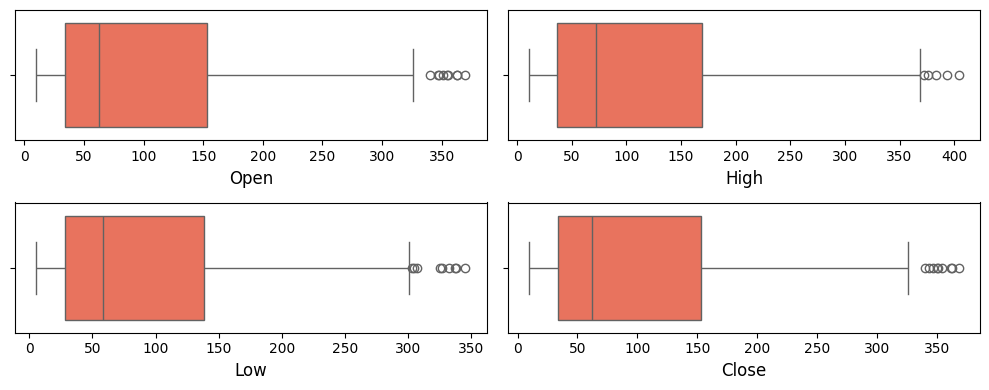

In [ ]:
# check for outliers in 'Open' , 'High', 'Low' and 'Close' columns
fig = plt.figure(figsize=(10,4))
c=1
for i in ['Open' , 'High', 'Low', 'Close'] :
    plt.subplot(2, 2, c)
    plt.xlabel(i, fontsize = 12)
    sns.boxplot(x=i,data=data,color="tomato")
    c = c + 1
plt.tight_layout()

----observation----

According to the above box-plots, there are some outliers in the dataset.
however we need to check if these are really outliers or possible correct values.
All columns have sort of same outliers value range which is above 300.

In [ ]:
#create a function to find outliers using IQR

def find_outliers_IQR(data):
   q1=data.quantile(0.25)
   q3=data.quantile(0.75)
   IQR=q3-q1
   outliers = data[((data<(q1-1.5*IQR)) | (data>(q3+1.5*IQR)))]
   return outliers

In [ ]:
# find outliers in percentage
for i in ['Open' , 'High', 'Low', 'Close']:
  outliers = find_outliers_IQR(data[i])
  outliers_percent = round((outliers.size/data[i].size)*100, 2)
  print(f'{i} : {outliers_percent}%')

Open : 4.86%
High : 2.7%
Low : 4.86%
Close : 4.86%


In [ ]:
# find outliers
for i in ['Open' , 'High', 'Low', 'Close']:
  outliers = find_outliers_IQR(data[i])
  print(f'{i} : ')
  print(outliers)

Open : 
145    363.00
146    351.00
147    354.60
151    355.00
154    362.85
155    348.00
156    340.00
157    369.95
158    347.20
Name: Open, dtype: float64
High : 
144    372.00
146    383.25
147    375.75
156    393.35
157    404.00
Name: High, dtype: float64
Low : 
145    337.37
146    345.50
150    307.35
151    304.65
153    303.30
154    325.70
155    327.35
156    332.45
157    338.00
Name: Low, dtype: float64
Close : 
144    361.96
145    351.15
146    350.00
150    354.45
153    362.05
154    346.20
155    339.60
156    367.90
157    343.40
Name: Close, dtype: float64


----observation----

all the outliers are from row index 144 to 157

In [ ]:
# analyze outliers
data[144:158]

,Date,Open,High,Low,Close,Year,Month,Quarter
144,2017-07-01,293.04,372.00,290.78,361.96,2017,7,3
145,2017-08-01,363.00,368.52,337.37,351.15,2017,8,3
146,2017-09-01,351.00,383.25,345.50,350.00,2017,9,3
147,2017-10-01,354.60,375.75,299.00,314.35,2017,10,4
148,2017-11-01,315.50,329.80,296.00,306.80,2017,11,4
149,2017-12-01,307.20,319.00,300.65,315.05,2017,12,4
150,2018-01-01,314.00,366.00,307.35,354.45,2018,1,1
151,2018-02-01,355.00,366.50,304.65,322.25,2018,2,1
152,2018-03-01,320.70,325.80,285.10,304.90,2018,3,1
153,2018-04-01,305.00,368.75,303.30,362.05,2018,4,2


----observation-----

From the above boxplots it seems like there are some outliers in the dataset.
But when we calculated the percentage we found that one 'High' column has more than 2.5 percent and all the other 3 columns have almost same which is 4.86 percent outliers and we can't consider more than 2 and 4 perecent of data as outliers blindly.
We know that these are stock prices, and all the outliers in all 4 columns are almost similar which is more than 300.
From all the above points we can say that these are not outliers , these are possible values.
and we also cross checked the prices on google of 'Yes Bank stock' in 2017 and 2018 as the outliers data belongs to these years.

### What all manipulations have you done and insights you found?

we have converted the string object to date for date column.
we have extracted the year from 'Date' and created a seprate 'Year' column.
Also created 'Month' and 'Quarter' variable from date.
checked for outliers and found out there is no outlier in the dataset.
And also there is no Null values.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 visualizing price trend since 2005 to 2020

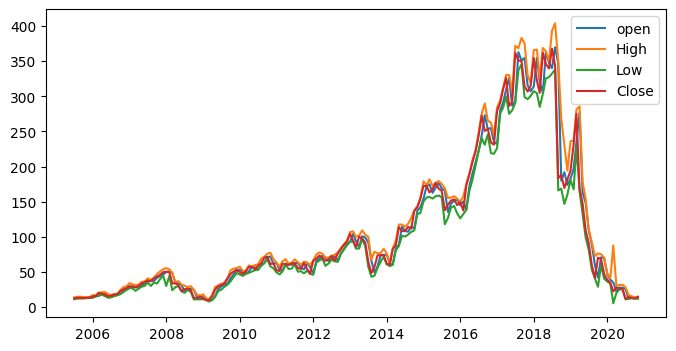

In [ ]:
#  visualizing price trend since 2005 to 2020
plt.figure(figsize = (8,4))
plt.plot(data['Date'] , data['Open'] , label = 'open')
plt.plot(data['Date'] , data['High'] , label = 'High')
plt.plot(data['Date'] , data['Low'], label = 'Low')
plt.plot(data['Date'] , data['Close'], label = 'Close')
plt.legend()

##### 1. Why did you pick the specific chart?

Line chart is good for visualizing price trends over time series data.

##### 2. What is/are the insight(s) found from the chart?

Stock price is increasing till 2018.
After 2018 price is decreased at very high rate.
We can say something happened in 2018 which impected the stock price negatively

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As it also mentioned in problem statement that some fraud case happened in 2018, which impected the business very negatively, which we can also see in above line chart.

#### Chart - 2 Visualizing min, max and mean prices for each year

Text(0.5, 36.72222222222221, 'Min-Max-Mean')

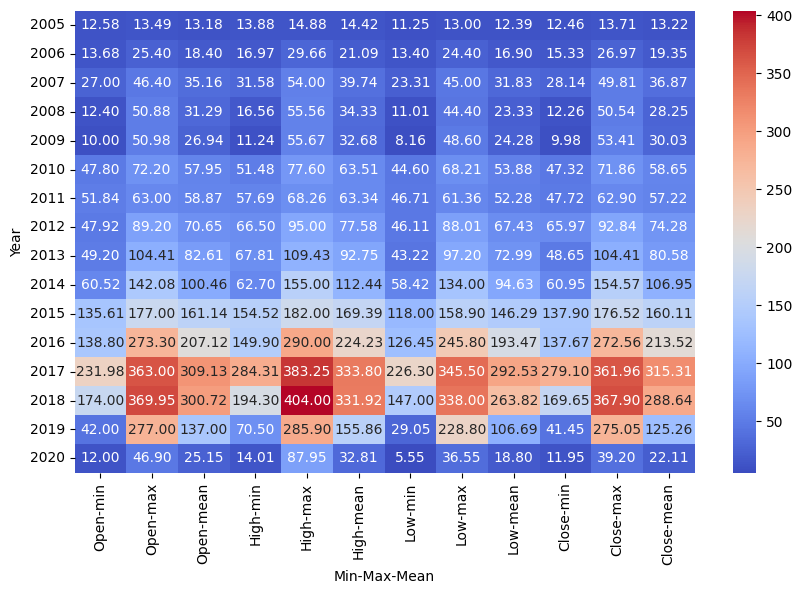

In [ ]:
# Visualizing min, max and mean prices for each year
Year_prices_df = data.groupby('Year').aggregate({'Open' : [min, max, 'mean'], 'High' : [min, max, 'mean'], 'Low' : [min, max, 'mean'], 'Close' : [min, max, 'mean']})
plt.figure(figsize = (10,6))
sns.heatmap(Year_prices_df , annot = True, cmap = 'coolwarm', fmt='.2f')
plt.xlabel('Min-Max-Mean')

##### 1. Why did you pick the specific chart?

Heatmap is best at visulaizing low and high values , where value is low , where it is high, where it is little low, where it is little high, where it is median something like this.

##### 2. What is/are the insight(s) found from the chart?

All time high was 404, it was in 2018.
All time low was 5.55, it was in 2020.
In year of 2017 and 2018 prices were at their peak.
Here also we can see price drop after 2018.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

All time high was 404, it was in 2018.
All time low was 5.55, it was in 2020.
In year of 2017 and 2018 prices were at their peak.
Here also we can see price drop after 2018.

#### Chart - 3 Visualizing price trends of each year separately

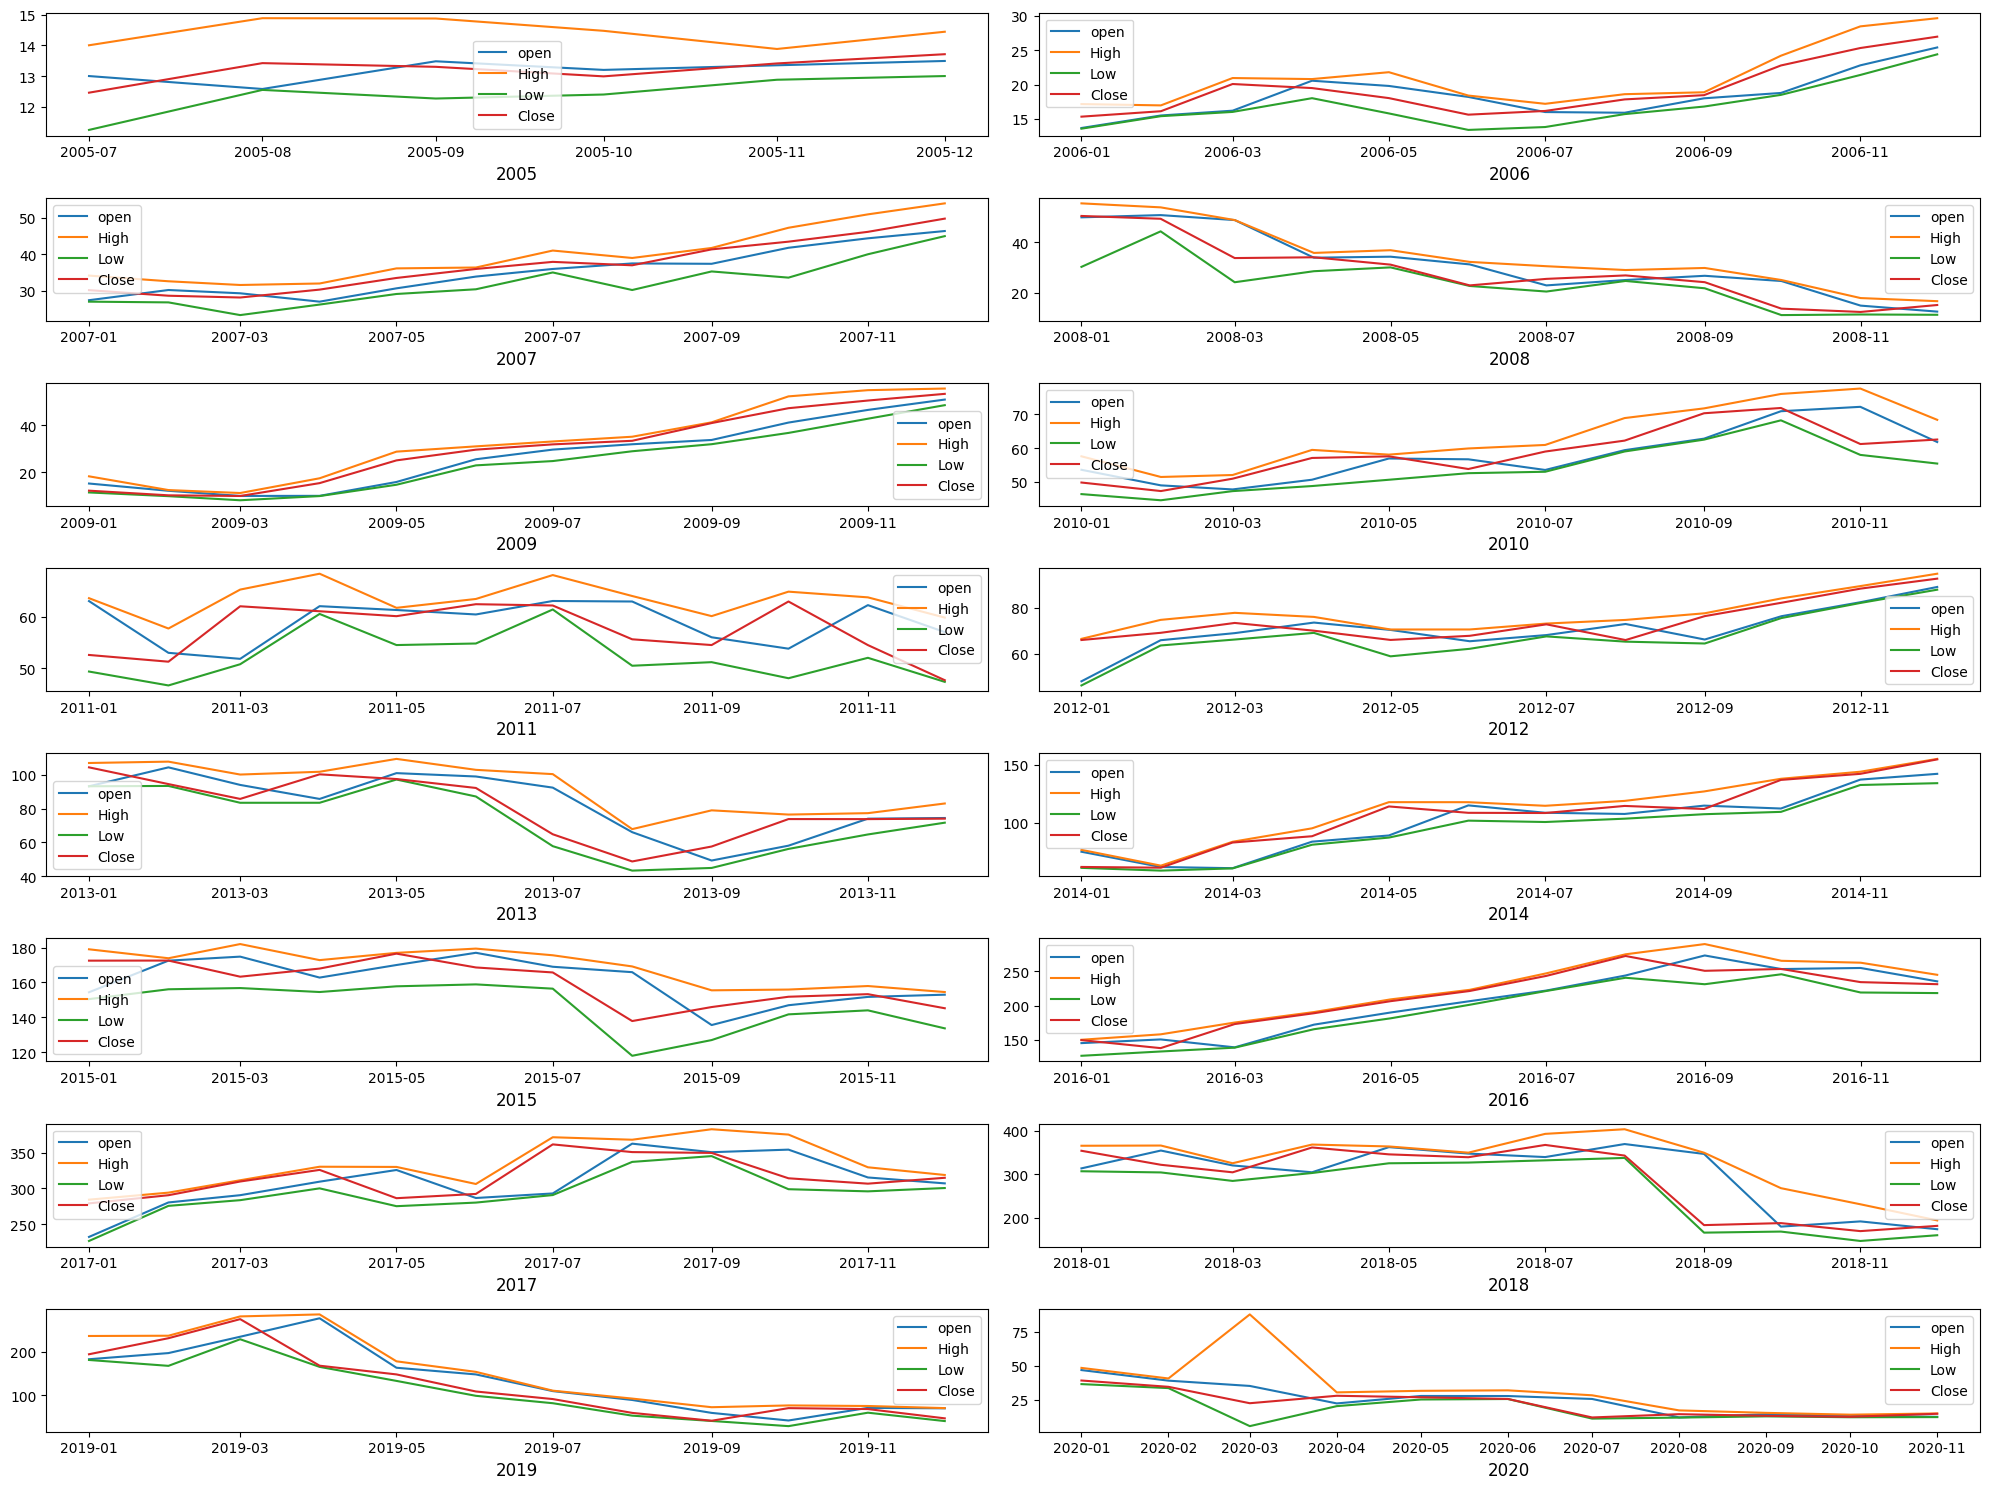

In [ ]:
# Visualizing price trends of each year separately
fig = plt.figure(figsize=(20,15))
c=1
for i in data['Year'].unique() :
    plt.subplot(8, 2, c)
    plt.xlabel(i, fontsize = 12)
    plt.plot(data['Date'][data['Year'] == i] , data['Open'][data['Year'] == i] , label = 'open')
    plt.plot(data['Date'][data['Year'] == i] , data['High'][data['Year'] == i] , label = 'High')
    plt.plot(data['Date'][data['Year'] == i] , data['Low'][data['Year'] == i], label = 'Low')
    plt.plot(data['Date'][data['Year'] == i] , data['Close'][data['Year'] == i], label = 'Close')
    plt.legend()
    c = c + 1
plt.tight_layout()


##### 1. Why did you pick the specific chart?

To visualize price trends of each year separately and line charts are good at visualizing price trends over period of time. we can above see when the prices were high and when they were low.

##### 2. What is/are the insight(s) found from the chart?

In most of the year price is increasing or stable from start to end.
Except in 2008, price is going down.
From 2016 to 2018, price is increased at high rate.
In 2018, price is going up till august, then it decreased at very high rate.
In 2019 and 2020 also, price is continuously decreasing.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it will help creating a positive business impact as stock price is increased at high rate in 2016 to 2018. They should implement the stragies, planning used in 2016 to 2018.
After 2018 price decreased very fast, we can say it may because of Rana kapoor fraud case, They should not let this type incident happens in future.

#### Chart - 4  Visualizing mean prices over months

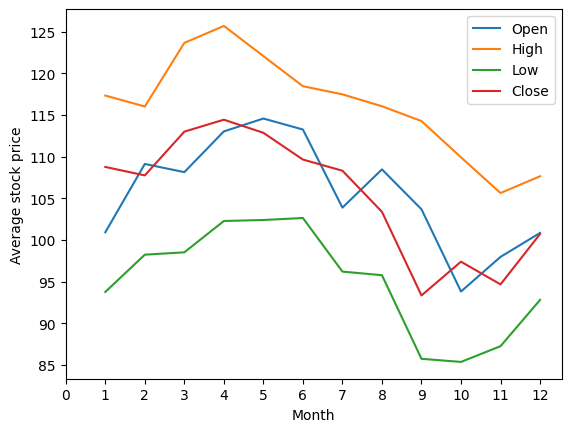

In [ ]:
# Visualizing Open, High, Low and Close average price  over months
data.groupby('Month').aggregate({'Open' : 'mean', 'High' : 'mean', 'Low' : 'mean', 'Close' : 'mean'}).plot()
plt.xticks(np.arange(13))
plt.ylabel('Average stock price')
plt.show()

##### 1. Why did you pick the specific chart?

To visualize average price trends over months, and line charts are good at visualizing price trends.

##### 2. What is/are the insight(s) found from the chart?

stock price is relatively going down in september and october.
Stock price is high in march and april.

##### 3. Will the gained insights help creating a positive business impact?


Yes, As stock price is relatively going down in september and october. These two months needs to be focused.

#### Chart - 5 Visualizing mean prices in each quarter

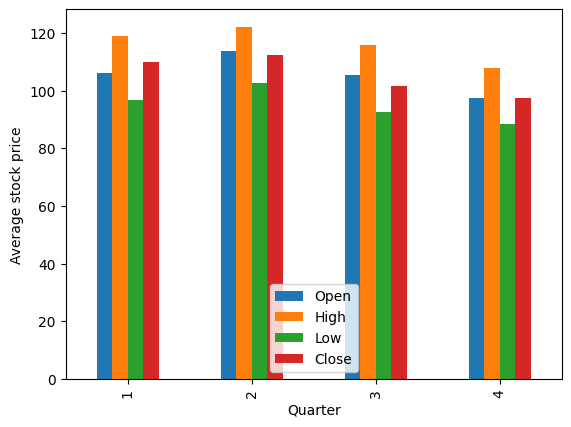

In [ ]:
# Visualizing Open, High, Low and Close average price trends over Quarter
data.groupby('Quarter').aggregate({'Open' : 'mean', 'High' : 'mean', 'Low' : 'mean', 'Close' : 'mean'}).plot.bar()
plt.ylabel('Average stock price')
plt.show()

##### 1. Why did you pick the specific chart?

Beacause we have only 4 xticks here, so the bar plot is batter than line chart here.

##### 2. What is/are the insight(s) found from the chart?

Stock price is slightly low in last quarter.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,Stock price is slightly low in last quarter.

#### Chart - 6 check distribution of 'Open' variable

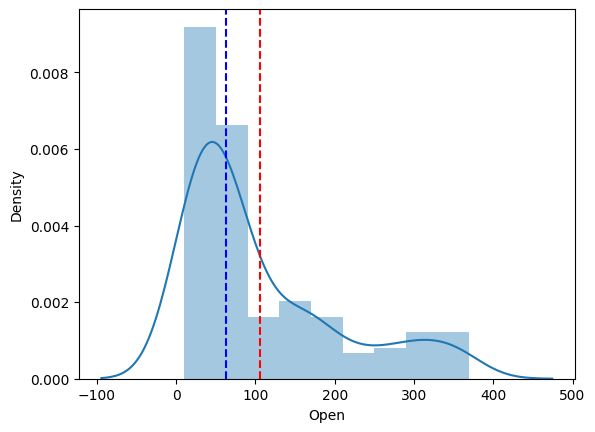

In [ ]:
# check distribution of 'Open' variable
sns.distplot(data['Open'])
plt.axvline(np.mean(data['Open']),color='r', linestyle='--')
plt.axvline(np.median(data['Open']),color='b', linestyle='--')

<Axes: xlabel='Open', ylabel='Density'>

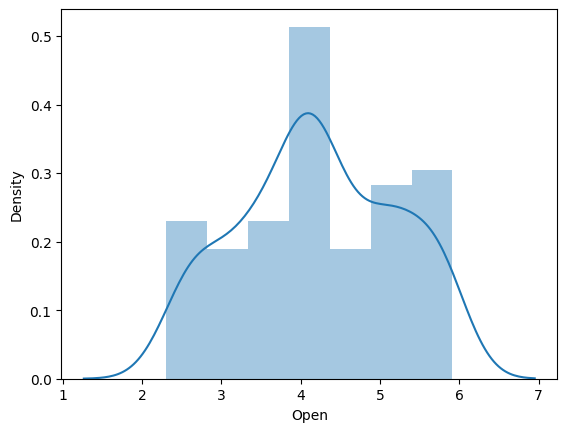

In [ ]:
# apply log transformation it has right skewed distribution
sns.distplot(np.log(data['Open']))

##### 1. Why did you pick the specific chart?

To check Distribution of the variable.

##### 2. What is/are the insight(s) found from the chart?

Positively Skewed Distribution
After applying Log transformation it become close to normal distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positively Skewed Distribution

#### Chart - 7 check distribution of 'High' variable

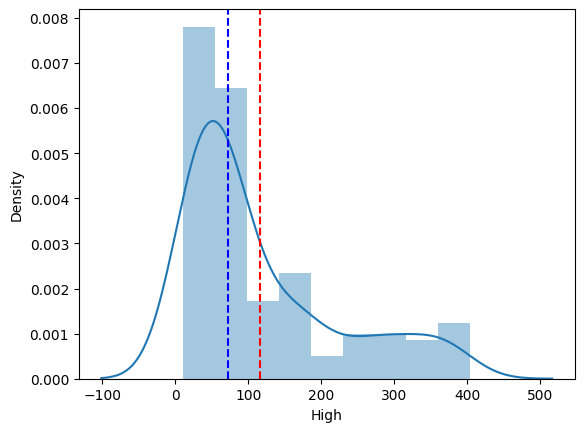

In [ ]:
# check distribution of 'High' variable
sns.distplot(data['High'])
plt.axvline(np.mean(data['High']),color='r', linestyle='--')
plt.axvline(np.median(data['High']),color='b', linestyle='--')

<Axes: xlabel='High', ylabel='Density'>

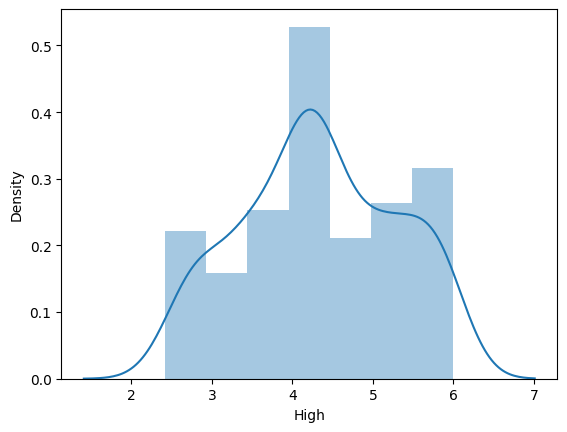

In [ ]:
# apply log transformation it has right skewed distribution
sns.distplot(np.log(data['High']))

##### 1. Why did you pick the specific chart?

To check Distribution of the variable.

##### 2. What is/are the insight(s) found from the chart?

Positively Skewed Distribution
After applying Log transformation it become close to normal distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positively Skewed Distribution

#### Chart - 8 check distribution of 'Low' variable

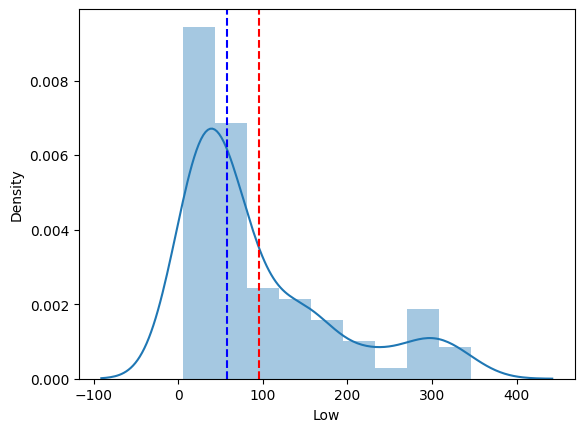

In [ ]:
# check distribution of 'Low' variable
sns.distplot(data['Low'])
plt.axvline(np.mean(data['Low']),color='r', linestyle='--')
plt.axvline(np.median(data['Low']),color='b', linestyle='--')

<Axes: xlabel='Low', ylabel='Density'>

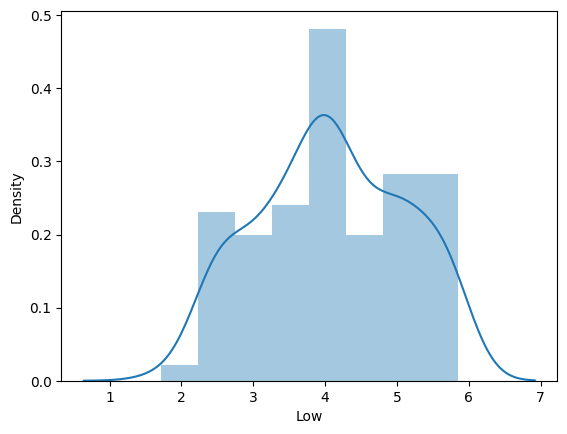

In [ ]:
# apply log transformation
sns.distplot(np.log(data['Low']))

##### 1. Why did you pick the specific chart?

To check Distribution of the variable.

##### 2. What is/are the insight(s) found from the chart?

Positively Skewed Distribution
After applying Log transformation it become close to normal distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positively Skewed Distribution

#### Chart - 9 check distribution of 'Close' variable

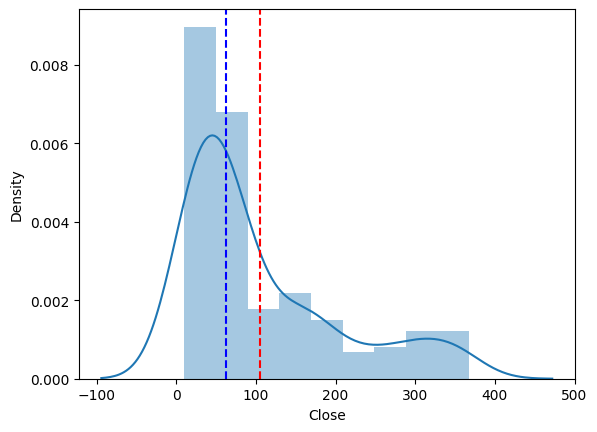

In [ ]:
# check distribution of 'Close' variable
sns.distplot(data['Close'])
plt.axvline(np.mean(data['Close']),color='r', linestyle='--')
plt.axvline(np.median(data['Close']),color='b', linestyle='--')

<Axes: xlabel='Close', ylabel='Density'>

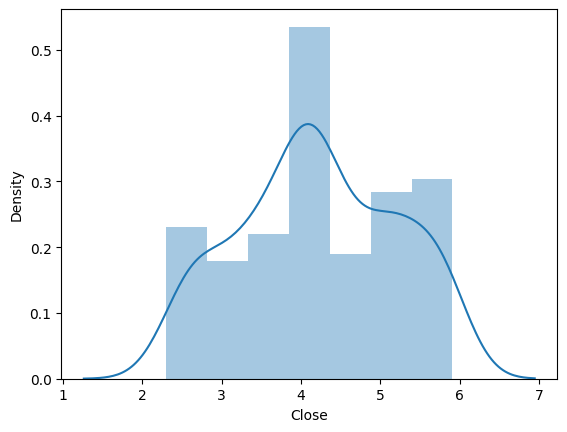

In [ ]:
# apply log transformation it has right skewed distribution
sns.distplot(np.log(data['Close']))

##### 1. Why did you pick the specific chart?

To check Distribution of the variable.

##### 2. What is/are the insight(s) found from the chart?

Positively Skewed Distribution
After applying Log transformation it become close to normal distribution.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positively Skewed Distribution

#### Chart - 10 reg plot to check the relation between 'Open' and the dependent variable 'Close'

<Axes: xlabel='Open', ylabel='Close'>

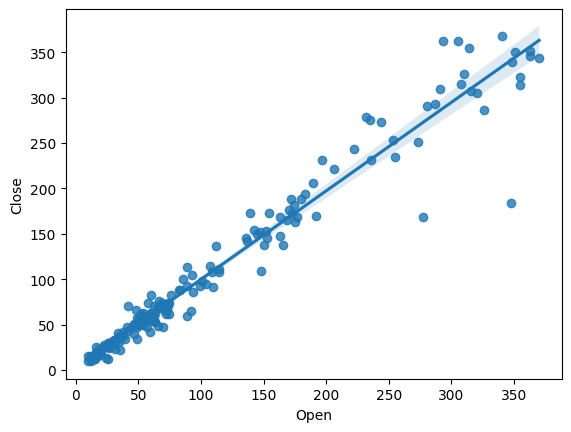

In [ ]:
# reg plot to check the relation between 'Open' and the dependent variable 'Close'
import seaborn as sns
import pandas as pd
sns.regplot(x='Open', y='Close', data=data)

##### 1. Why did you pick the specific chart?

Regplot is very good at visualizing linear relation between two variables.

##### 2. What is/are the insight(s) found from the chart?

strong linear pattern

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

strong linear pattern

#### Chart - 11 reg plot to check the relation between 'High' and the dependent variable 'Close'

<Axes: xlabel='High', ylabel='Close'>

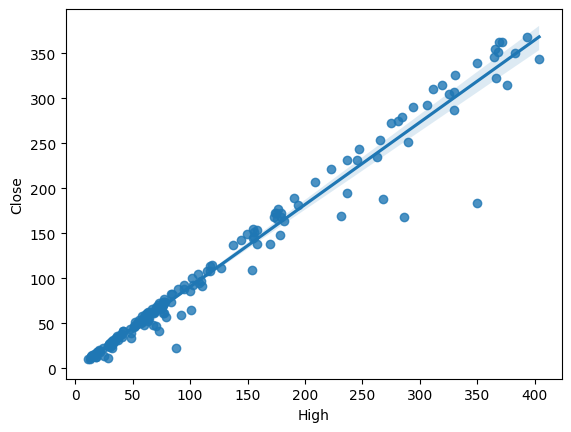

In [ ]:
# reg plot to check the relation between 'High' and the dependent variable 'Close'
sns.regplot(x='High', y='Close', data=data)

##### 1. Why did you pick the specific chart?

To visualize linear relation between two variables.

##### 2. What is/are the insight(s) found from the chart?

strong linear pattern

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

strong linear pattern

#### Chart - 12 reg plot to check the relation between 'Low' and the dependent variable 'Close'

<Axes: xlabel='Low', ylabel='Close'>

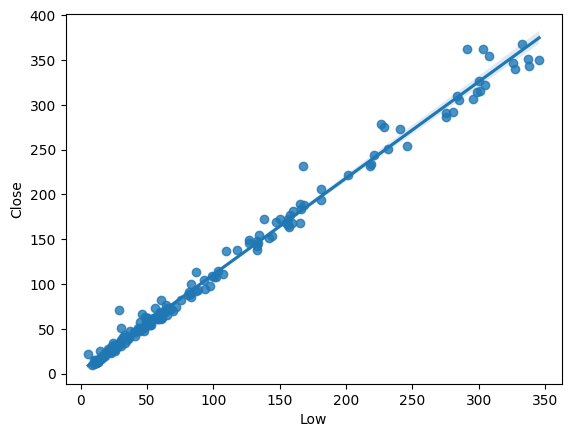

In [ ]:
# Chart - 12 visualization code
# reg plot to check the relation between 'Low' and the dependent variable 'Close'
sns.regplot(x='Low', y='Close', data=data)

##### 1. Why did you pick the specific chart?

To visualize linear relation between two variables.

##### 2. What is/are the insight(s) found from the chart?

strong Linear pattern

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

strong linear pattern

#### Chart - 13  reg plot to check the relation between 'Year' and the dependent variable 'Close'

<Axes: xlabel='Year', ylabel='Close'>

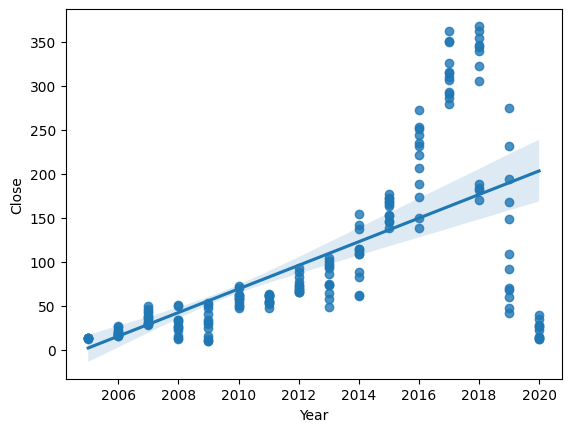

In [ ]:
# reg plot to check the relation between 'Year' and the dependent variable 'Close'
sns.regplot(x='Year', y='Close', data=data)

##### 1. Why did you pick the specific chart?

To visualize linear relation between two variables.

##### 2. What is/are the insight(s) found from the chart?

Price is going up with year, unless something unusual happen.
Non linear relation, Polynomial fit can help while model implementation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Price is going up with year, unless something unusual happen.

#### Chart - 14 - Correlation Heatmap

<Axes: >

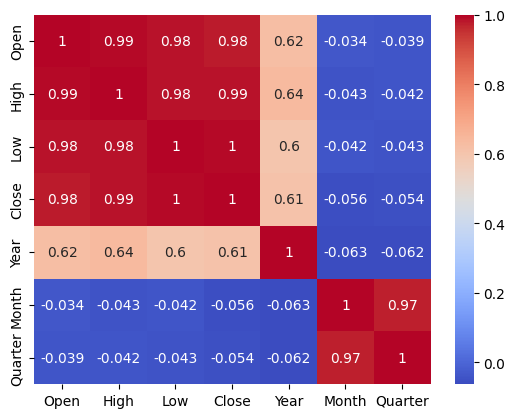

In [ ]:
# Correlation Heatmap visualization code
sns.heatmap(data.corr() , annot = True, cmap = 'coolwarm')

##### 1. Why did you pick the specific chart?

heatmap is good visualizing corellation between variables.

##### 2. What is/are the insight(s) found from the chart?

Clossing price has very strong corellation with open, high and low variable.
Clossing price has low corellation with year, month and quarter as compared to other variables.
we also have problem of multicollinearity here as independent variables also have strong co-relation with eachother.

#### Chart - 15 - Pair Plot

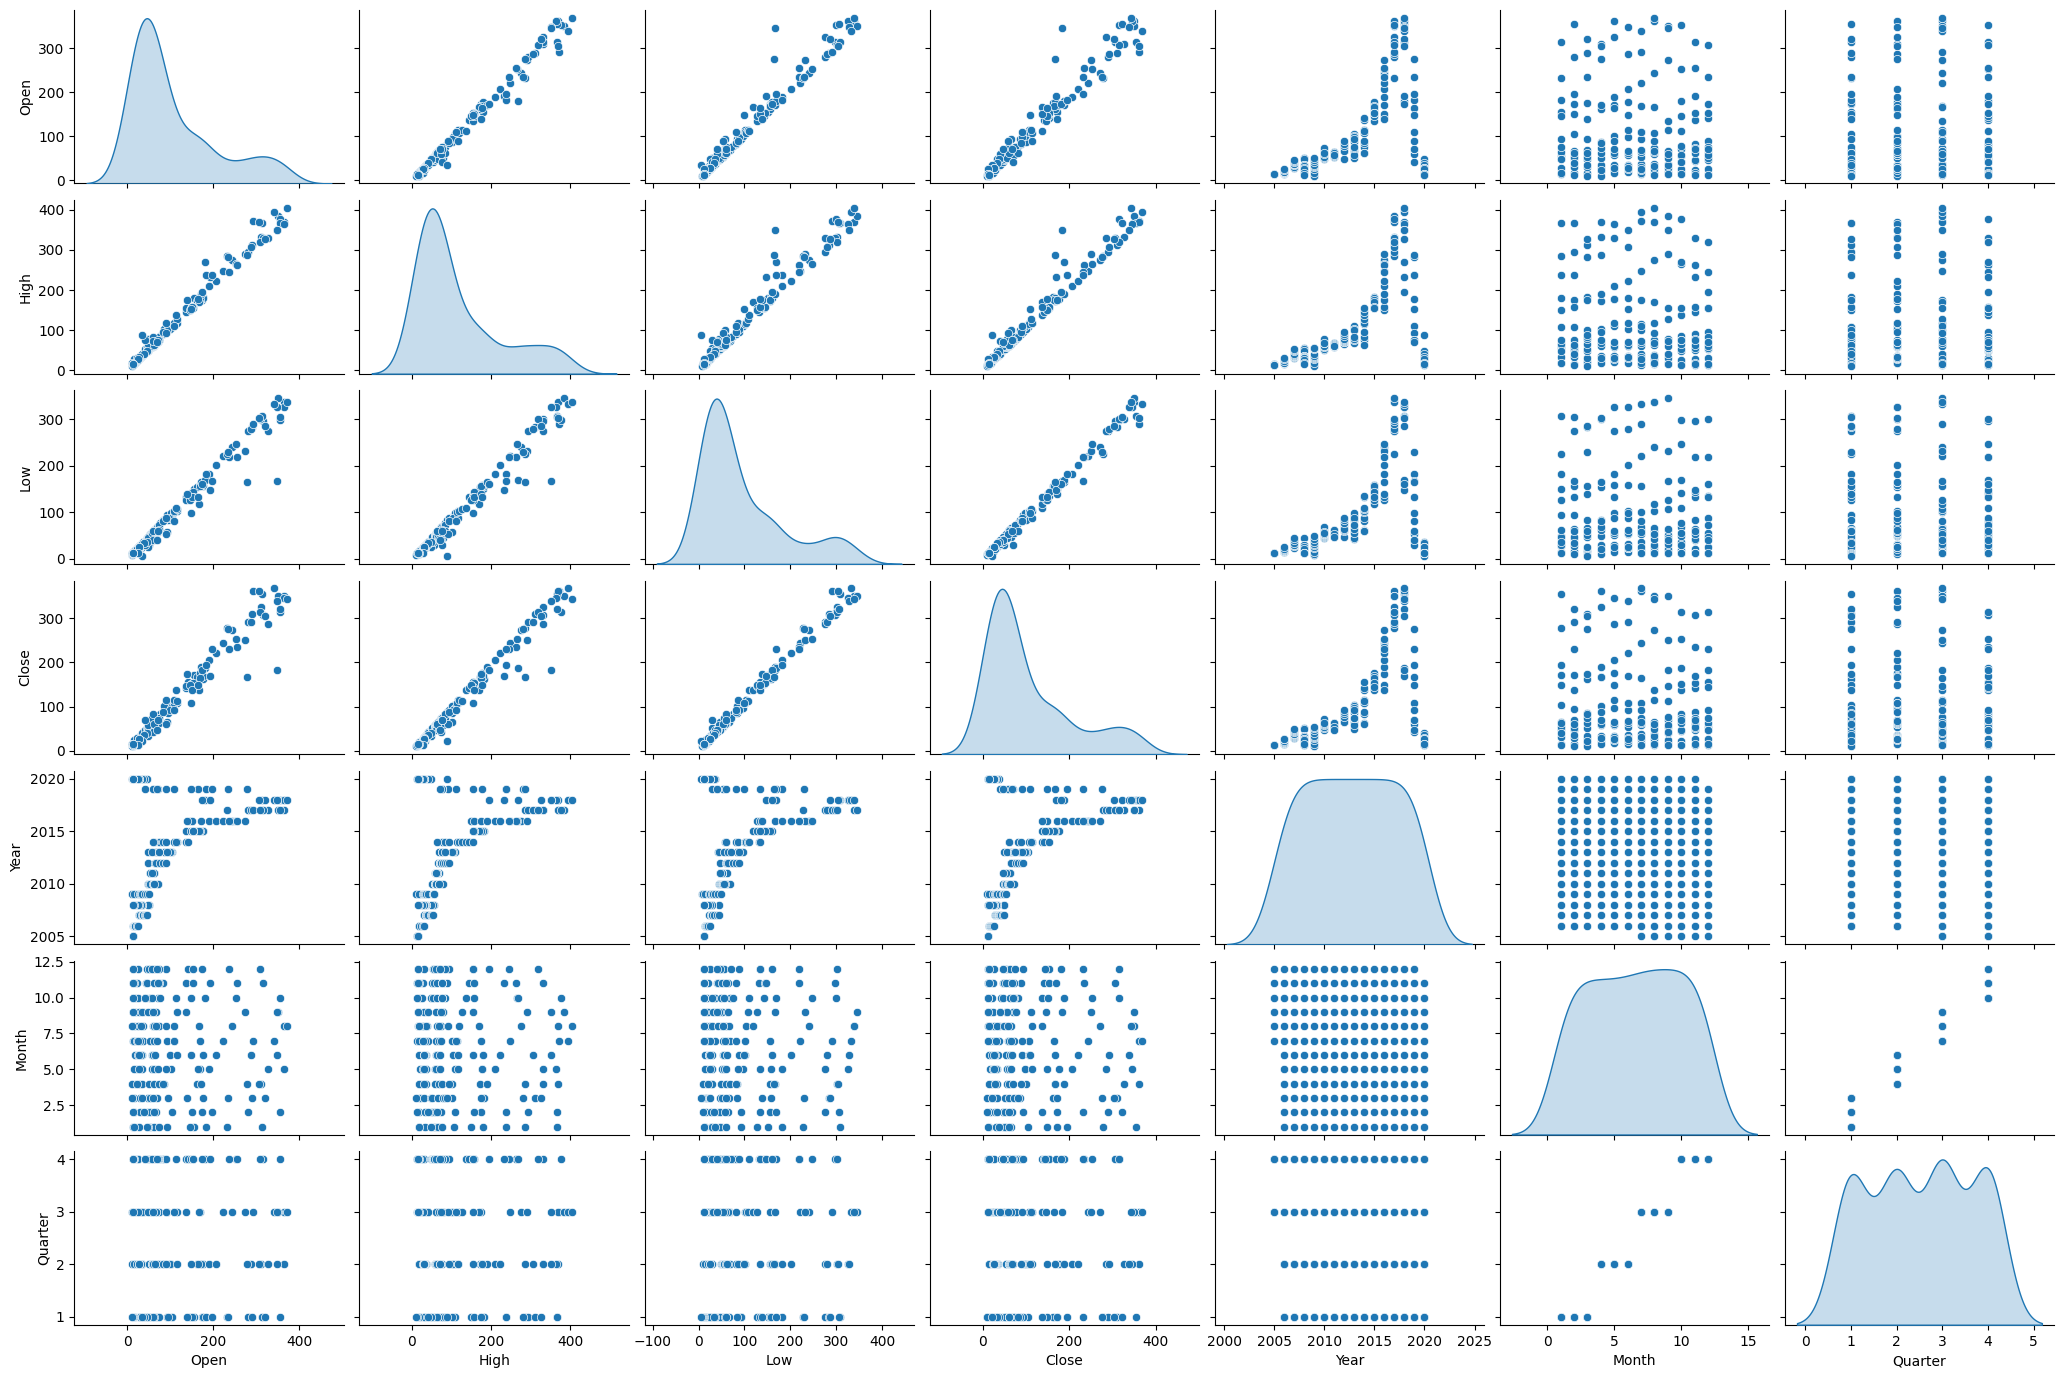

In [ ]:
# Pair Plot visualization code
#sns.pairplot(data , diag_kind = 'kde')
sns.pairplot(data, diag_kind='kde', height=2, aspect=1.5)

##### 1. Why did you pick the specific chart?

Pair plot is good as visualising scatter plot and distribution together.
pair plot also good at showing realtion variables with scatter plot.
I used pair plot to analyse the patterns of data and realationship between the features.
It's exactly same as the correlation map but here you will get the graphical representation.

##### 2. What is/are the insight(s) found from the chart?

Open , high, low and close variables has skewed diatribution.
Open , high, low and close variables are showing strong linear pattern with eachother.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. Average Closing stock price is more than 100.
2. Average Closing stock price is equals to average Opening stock Price.
3. Average closing stock price in 2018 is more than 300.

### Hypothetical Statement - 1
Average Closing stock price is more than 100.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0 : μ = 100

Alternate hypothesis H1 : μ > 100

Test type : Right Tailed test

singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import norm
mean = 100
sample_mean = np.mean(data['Close'])         # mean
sample_size = data['Close'].size             # sample size
std = np.std(data['Close'])                  # standard deviation

# z-test
z_value = (sample_mean - mean) / (std/np.sqrt(sample_size))

# calculate p-value
p_value = 1 - norm.cdf(z_value)                # Right tailed test

# conclusion
significance_level = 0.05
if p_value>significance_level:
  print(f"Failed to reject the Null Hypothesis as p-value = {p_value}.")
else:
  print(f"Null Hypothesis rejected Successfully as p-value = {p_value}")

Failed to reject the Null Hypothesis as p-value = 0.23575048075613925.


##### Which statistical test have you done to obtain P-Value?

I have used Z-Test as the statistical test to obtain P-Value and found the result that At the 5% significance level, There is not enough evidence to reject the Null hypothesis.

##### Why did you choose the specific statistical test?

Because sample sizes are large enough, more than 30.

### Hypothetical Statement - 2
Average Closing stock price is equals to average Opening stock Price.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0 : μ1 = μ2

Alternate hypothesis H1 : μ1 ≠ μ2

Test type : Two Tailed test

singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
open_mean = np.mean(data['Open'])              # mean
close_mean = np.mean(data['Close'])

open_size = data['Close'].size                 # sample size
close_size = data['Close'].size

open_var = np.var(data['Open'])                # Variance
close_var = np.var(data['Close'])

# z-test
z_value = (open_mean - close_mean) / np.sqrt((open_var/open_size) + (close_var/close_size))

# calculate p-value
p_value = norm.cdf(z_value)

# Two tailed test
if p_value < 0.5:
  p_value = p_value * 2
else:
  p_value = (1 - p_value)*2

# conclusion
significance_level = 0.05
if p_value>significance_level:
  print(f"Failed to reject the Null Hypothesis as p-value = {p_value}.")
else:
  print(f"Null Hypothesis rejected Successfully as p-value = {p_value}")


Failed to reject the Null Hypothesis as p-value = 0.9737638583014707.


##### Which statistical test have you done to obtain P-Value?

I have used two sample Z-Test as the statistical test to obtain P-Value and found the result that At the 5% significance level, There is not enough evidence to reject the Null hypothesis. so, we can conclude that average Closing stock price is equal to average Opening stock Price.

##### Why did you choose the specific statistical test?

Because sample sizes are large enough, more than 30.

### Hypothetical Statement - 3
Average closing stock price in 2018 is more than 300.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis H0 : μ = 300

Alternate hypothesis H1 : μ > 300

Test type : Right Tailed test

singificance level = 0.05

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import numpy as np
from scipy.stats import t

mean = 100
sample_mean = np.mean(data['Close'][data['Year'] == 2018])         # mean
sample_size = data['Close'][data['Year'] == 2018].size             # sample size
std = np.std(data['Close'][data['Year'] == 2018])                  # standard deviation

# t-test
t_statistic = (sample_mean - mean) / (std/np.sqrt(sample_size))

# calculate p-value
p_value = 1 - t.cdf(t_statistic, sample_size-1)                # Right tailed test

# conclusion
significance_level = 0.05
if p_value>significance_level:
  print(f"Failed to reject the Null Hypothesis as p-value = {p_value}.")
else:
  print(f"Null Hypothesis rejected Successfully as p-value = {p_value}")

Null Hypothesis rejected Successfully as p-value = 2.1097283474658113e-06


##### Which statistical test have you done to obtain P-Value?

 have used t-test as the statistical test to obtain P-Value and found the result that At the 5% significance level, we have sufficient evidence to reject the Null hypothesis. so, we can conclude that average closing stock price in 2018 is more than 300.

##### Why did you choose the specific statistical test?

Because sample size is small, less than 30.
And population variance is unknown.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
'''
# No missing values
'''


'\n# No missing values\n'

#### What all missing value imputation techniques have you used and why did you use those techniques?

There is no missing values in the dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
'''
# No outliers
'''

'\n# No outliers\n'

##### What all outlier treatment techniques have you used and why did you use those techniques?

There is no outliers in the dataset.

### 3. Categorical Encoding

<Axes: >

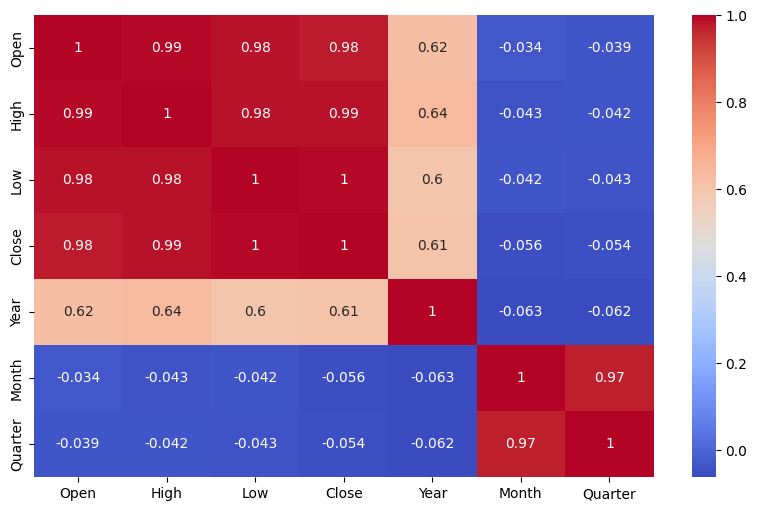

In [ ]:
# Encode your categorical columns
# correlation heatmap
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

In [ ]:
# Encode your categorical columns

# get dummies variable for month feature
df = pd.get_dummies(data,columns = ['Month'], prefix='month')

#### What all categorical encoding techniques have you used & why did you use those techniques?

used pd.get_dummies to create dummy variables for month feature.

### 4. Feature Manipulation & Selection

<Axes: >

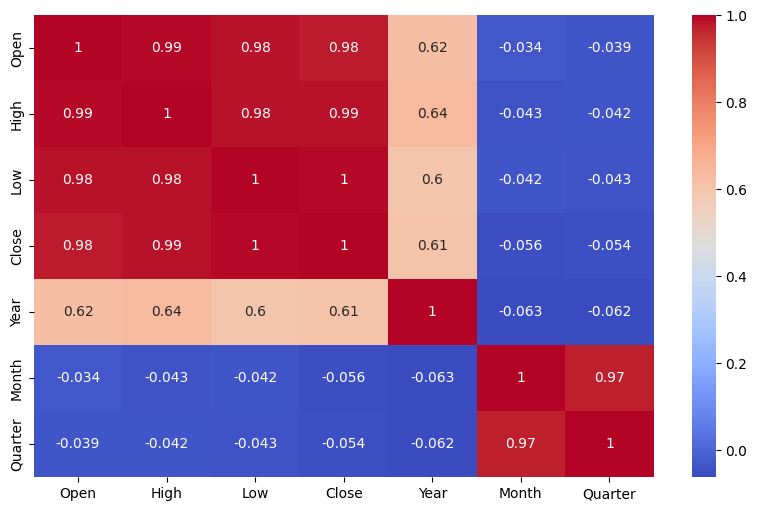

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
# correlation heatmap
plt.figure(figsize = (10,6))
sns.heatmap(data.corr(), annot = True, cmap = 'coolwarm')

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# create new feature by taking averege of (open, low, high) as they are highly correalation with each other
data['OHL'] = data[['Open', 'High', 'Low']].mean(axis=1).round(2)

data.head()

,Date,Open,High,Low,Close,Year,Month,Quarter,OHL
0,2005-07-01,13.00,14.00,11.25,12.46,2005,7,3,12.75
1,2005-08-01,12.58,14.88,12.55,13.42,2005,8,3,13.34
2,2005-09-01,13.48,14.87,12.27,13.30,2005,9,3,13.54
3,2005-10-01,13.20,14.47,12.40,12.99,2005,10,4,13.36
4,2005-11-01,13.35,13.88,12.88,13.41,2005,11,4,13.37


<Axes: xlabel='OHL', ylabel='Density'>

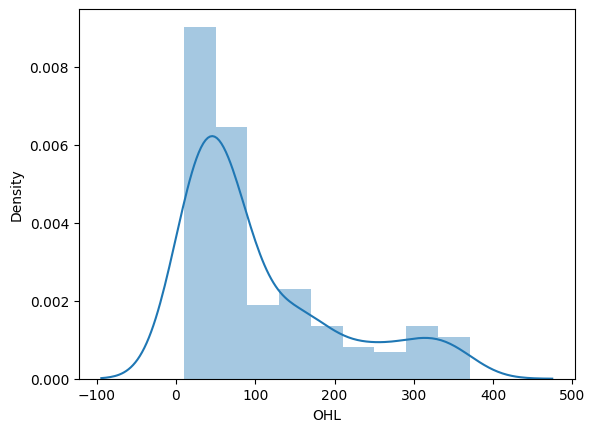

In [ ]:
# check OHL distribution
sns.distplot(data['OHL'])

<Axes: xlabel='OHL', ylabel='Density'>

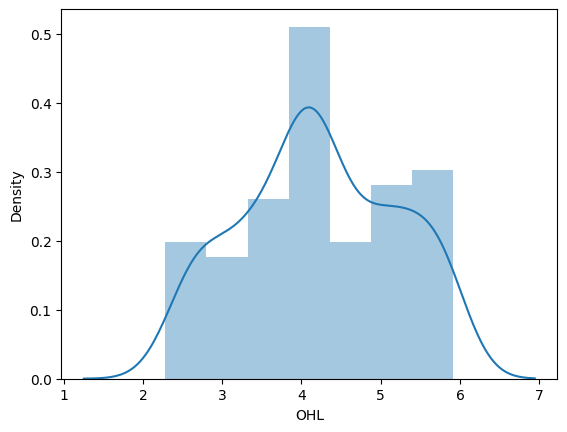

In [ ]:
# apply log transform on 'OHL
sns.distplot(np.log(data['OHL']))

Text(0.5, 1.0, 'OHL vs Close')

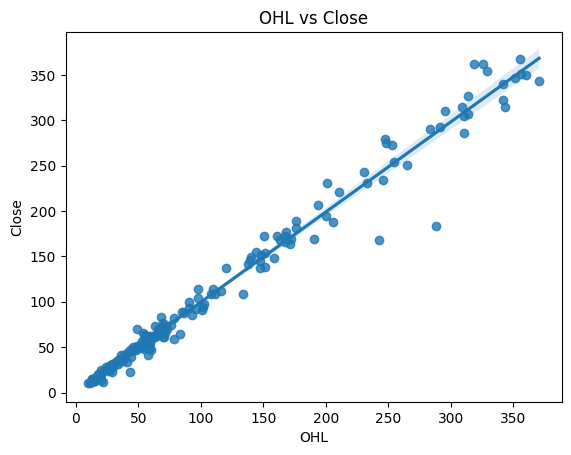

In [ ]:
# regplot 'OHL' vs 'close'
sns.regplot(x=data['OHL'], y=data['Close'])
plt.title('OHL vs Close')

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

selected_features = [ 'Year','OHL','Month', 'Close']

selected_df = data[selected_features]


<Axes: >

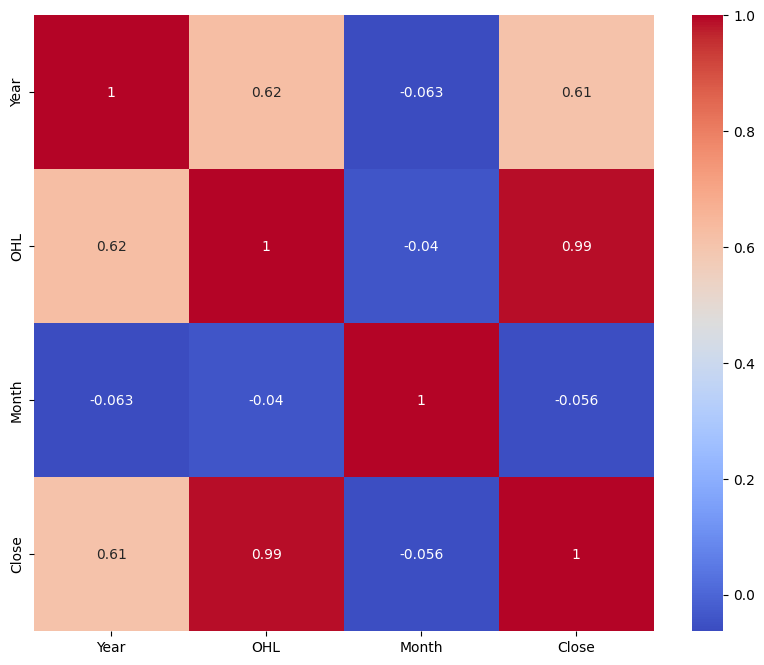

In [ ]:
# correlation heatmap
plt.figure(figsize = (10,8))
sns.heatmap(selected_df.corr(), annot = True, cmap = 'coolwarm')

##### What all feature selection methods have you used  and why?

Feature engineering
Created a new feature 'OHL' feature from 'Open', 'High' and 'Low' feature as they were had strong correlation with eachother as well as dependent variable 'Close'.
created dummy variables for 'Month' feature.
multicollinearity
droped 'Open', 'High' and 'Low' feature as they were had strong correlation with eachother.
droped 'quarter' as it was highly correalated with 'month'.
Correaltion
selected features based on their correlation with dependent variable.

##### Which all features you found important and why?

'OHL' which is average of 'Open', 'High' and 'Low'is most important as it is highly correlated with dependent variable.
'Year' and 'month' are also important features as it is a timeseries dataset and also has decent correlation with dependent variable.

### 5. Data Transformation

In [ ]:
# creating the set of dependent and independent variables
x = selected_df.drop(labels=['Close'], axis=1)
y = selected_df['Close']

<Axes: xlabel='OHL', ylabel='Density'>

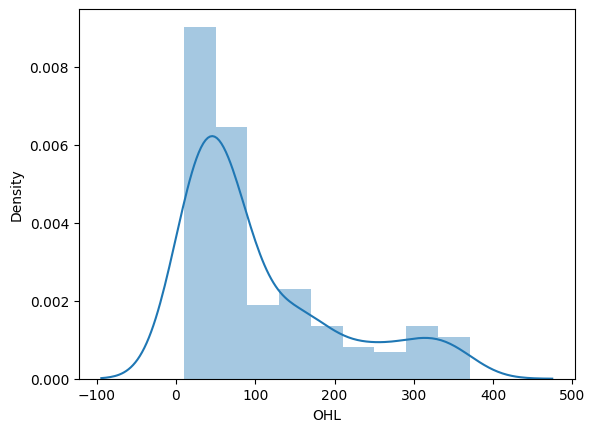

In [ ]:
# distribution 'OHL'
sns.distplot(x['OHL'])

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Data transformation is need on 'OHL', as you can see in above plot, it is a right skewed distribution. i'm going to use log transform.

In [ ]:
# Transform Your data
# log transform
x['OHL'] = np.log(x['OHL'])

### 6. Data Scaling

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

##### Which method have you used to scale you data and why?

StandardScaler, Many machine learning algorithms assume that the input features are normally distributed, and have similar means and standard deviations. If the features are not normalized, they may have different scales and ranges, which can lead to bias in the algorithm's predictions. Standard scaling can help prevent this bias by ensuring that each feature has a similar range and distribution.

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

No, dimensionality reduction is not needed here because Dimensionality reduction is a process of reducing the number of features and we do not have too many features in this dataset.

In [ ]:
# DImensionality Reduction (If needed)
'''
# No, dimensionality reduction is not needed here because there are not too many features.
'''

'\n# No, dimensionality reduction is not needed here because there are not too many features.\n'

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

##### What data splitting ratio have you used and why?

80/20, because

A common splitting ratio for supervised learning tasks is the 80/20 or 70/30 split, where 80% or 70% of the data is used for training the model, and the remaining 20% or 30% is used for evaluating the model's performance on unseen data (i.e., testing data). This ensures that the model is not overfitting to the training data and can generalize well to new, unseen data.
Also we don't have larger dataset here and we need to take a decent amount of data to full fill testing process. if we had a larger datasets, a 90/10 or 95/5 split may be used, where the model is trained on a larger portion of the data, while still keeping a small portion aside for evaluation

## ***7. ML Model Implementation***

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model
# function to plot actual vs prediction

from sklearn.model_selection import TimeSeriesSplit

def plot_actual_vs_pred(model, model_name = None, x_test = x_test, y_test = y_test):
  '''
  Visualizing Actual VS Prediction
  '''
  # Predict on the model
  y_pred = model.predict(x_test)
  plt.plot(y_pred, label="Prediction", linewidth=1.5)
  plt.plot(y_test.values, label="Actual", linewidth=1.5)
  error = mean_absolute_error(y_test, y_pred)
  plt.title(f"{model_name} - Actual VS Prediction")
  plt.legend(loc="best")
  plt.tight_layout()
  plt.grid(True)
  plt.show()



# 5 fold time-series cross-validation
tscv = TimeSeriesSplit(n_splits=5)


# function to calculate and plot Cross Validation Performance
def plot_cv_perfomance(model, model_name = None, x_train = x_train, y_train = y_train, y_lim = (0, 1.1)):
  '''
  a function to calculate and plot Cross Validation Performance
  '''
  cv_results = cross_validate(model, x_train, y_train, scoring='r2', cv = tscv, return_train_score=True)
  # Plot mean accuracy scores for training and testing scores
  plt.plot(cv_results['train_score'], label = "Training Score", marker='o', markersize=6, color = 'b', linewidth=2)
  plt.plot(cv_results['test_score'], label = "Cross Validation Score", marker='o', markersize=6, color = 'g', linewidth=2)
  plt.title(f"{model_name} - Cross Validation Performance Plot")
  # plt.xlabel("K-fold cross validation")
  plt.ylabel("R2-score")
  plt.ylim(y_lim)
  plt.tight_layout()
  plt.legend(loc = 'best')
  plt.grid(True)
  plt.show()
  print(f"\nThe CV test_Score : {cv_results['test_score']}")
  print(f"Mean cross-validation score : {cv_results['test_score'].mean()}\n")



# function to plot coeficients
def plot_coef(model,model_name = None):
  features = selected_df.drop('Close', axis = 1).columns
  cofficients = model.coef_
  plt.bar(features,cofficients)
  plt.xticks(fontsize = 12, rotation=90)
  plt.title(f'{model_name} - Coeficients')
  plt.grid(True, axis='y')
  plt.hlines(y=0, xmin=0, xmax=len(cofficients), linestyles='dashed')
  plt.show


# function to check homoscedasticity
def check_homoscedasticity(model, model_name = None, x_test = x_test, y_test = y_test):
  '''
  function to check homoscedasticity
  '''
  y_pred = model.predict(x_test)
  residuals = y_test - y_pred
  plt.scatter(y_pred, residuals)
  plt.title(f'{model_name} - Residual Plot')
  plt.xlabel('Predicted value')
  plt.ylabel('residuals')
  plt.show()



 # selected features
features = selected_df.drop('Close', axis = 1).columns
# create dataframe for evaluation metrics
e_metrics_df = pd.DataFrame({'metrics' : ['R2_score', 'adjusted_r2', 'MSE', 'RMSE', 'MAPE', 'MAE']})

# funtion to update e_metrics_df
def update_e_metrics_df(model, model_name = None, x_test = x_test, y_test = y_test):
  '''
  funtion to update e_metrics_df dataFrame
  '''
  # Predict on the model
  y_pred = model.predict(x_test)

  # Evaluation metric scores
  R2_score = round(r2_score(y_test, y_pred), 3)
  n = y_test.size
  p = features.size
  adjusted_r2 = round(1-(1-R2_score)*(n-1)/(n-p-1),3)
  MSE = round(mean_squared_error(y_test, y_pred), 3)
  RMSE = round(np.sqrt(MSE), 3)
  MAPE = round(mean_absolute_percentage_error(y_test, y_pred), 3)
  MAE =  round(mean_absolute_error(y_test, y_pred), 3)

  # update e_metrics datframe
  e_metrics_df[model_name] = [R2_score, adjusted_r2, MSE, RMSE, MAPE, MAE]
  return e_metrics_df


### ML Model - 1
## Random Forest:
Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees and a technique called Bootstrap and Aggregation, commonly known as bagging

In [ ]:
# RandomForestRegressor Implementation
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state=1)
# Fit the Algorithm
rf.fit(x_train, y_train)
print(f'Training Score : {rf.score(x_train,y_train)}')
print(f'Testing Score : {rf.score(x_test,y_test)}')

Training Score : 0.9964288303184003
Testing Score : 0.9871568480119846


----observation----

Both training and testing score are very good.

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
from sklearn.metrics import mean_absolute_percentage_error
update_e_metrics_df(model = rf, model_name = 'Randomforest')

,metrics,Randomforest
0,R2_score,0.987
1,adjusted_r2,0.986
2,MSE,118.919
3,RMSE,10.905
4,MAPE,0.092
5,MAE,7.488


----observation----

got pretty good metric scores in randomForest model.

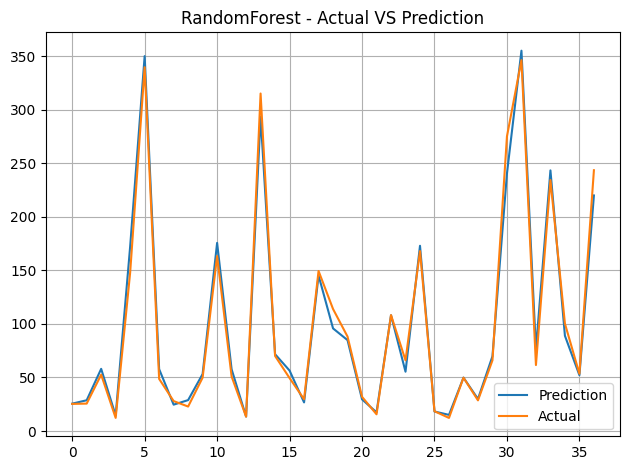

In [ ]:
# Visualizing evaluation Metric Score chart
# Visualizing Actual VS Prediction - RandomForestRegressor
plot_actual_vs_pred(model = rf, model_name = 'RandomForest')

----observation----

predicted values are very close to actual values.

#### 2. Cross- Validation & Hyperparameter Tuning

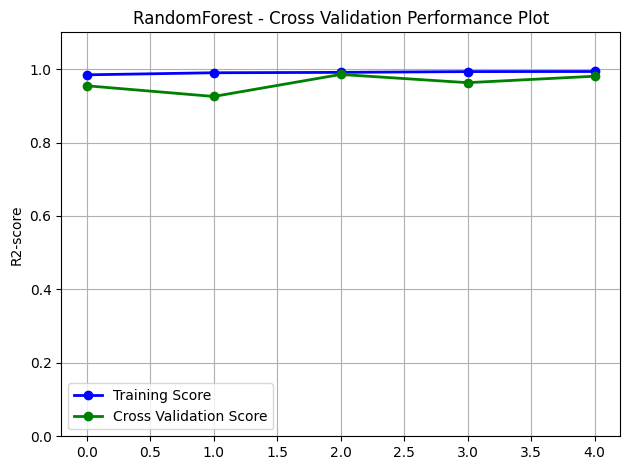


The CV test_Score : [0.95450597 0.92538032 0.98529528 0.96291894 0.98049497]
Mean cross-validation score : 0.9617190956119973



In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

#  RandomForest - Cross Validation r2-score and Performance Plot
from sklearn.model_selection import cross_validate
plot_cv_perfomance(model = rf, model_name = 'RandomForest')

----observation----

cross validation score is 0.96 which is pretty good.

<Axes: title={'center': 'Random Forest Regressor Feature Importance'}>

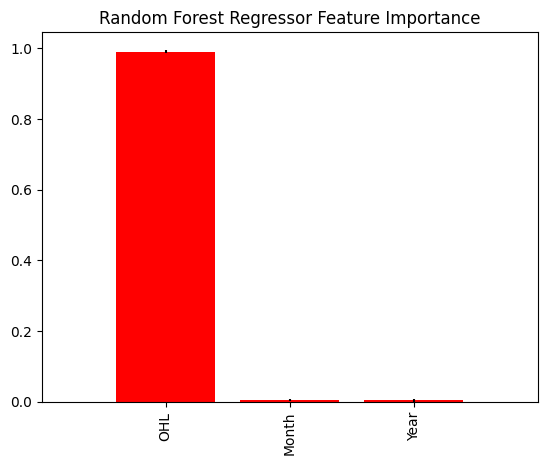

In [ ]:
# Random Forest Regressor Feature Importance
import scikitplot as skplt
features = selected_df.drop('Close', axis = 1).columns
skplt.estimators.plot_feature_importances(rf, feature_names=features,
                                         title="Random Forest Regressor Feature Importance",
                                         x_tick_rotation=90,)

----observation----

'OHL' variable has highest coeficient value, it is contributing more to the model.
other variables are not adding much value to the model.

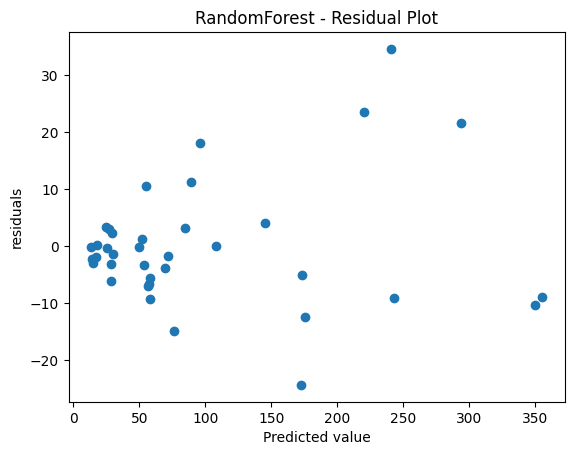

In [ ]:
# Check for homoscedasticity - RandomForest
check_homoscedasticity(model = rf, model_name = 'RandomForest')

---observation----

residuals is increasing with predicted values at some points.
high error for larger predicted values at some points.

In [ ]:
# RandomForestRegressor Implementation with GridSearchCV hyperparameter optimization technique
from datetime import datetime
parameters = {'n_estimators': [100,105,110,115,120,130,150],
              'max_depth': [10,15,18,20,22,25,30,40,50],}
start = datetime.now()
grid_rf = GridSearchCV(RandomForestRegressor(), parameters, scoring='r2', cv=tscv)

# Fit the Algorithm
grid_rf.fit(x_train, y_train)
print(f"The best score : {grid_rf.best_score_} \n")
print(f"The best fit parameters are found out to be : {grid_rf.best_params_} \n")
end = datetime.now()
execution_time = round((end - start).seconds/60,2)
print(f'The computational time for finding the best parameters for random forest regressor model: {execution_time} minutes\n')

The best score : 0.9668118463514148 

The best fit parameters are found out to be : {'max_depth': 25, 'n_estimators': 115} 

The computational time for finding the best parameters for random forest regressor model: 0.9 minutes



##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV for Random forest regressor hyperparameter tunning because here we have small data size and also tunning 2 parameters only.

In [ ]:
# Implementing Optimal Randomforest Model with best parameters
optimal_rf = grid_rf.best_estimator_
# Fit the Algorithm
optimal_rf.fit(x_train, y_train)
print(f'Training Score : {optimal_rf.score(x_train,y_train)}')
print(f'Testing Score : {optimal_rf.score(x_test,y_test)}')

Training Score : 0.995626701508647
Testing Score : 0.9866560702530781


In [ ]:
# Metric Score chart
update_e_metrics_df(model = optimal_rf, model_name = 'Optimal_RandmForest')

,metrics,Randomforest,Optimal_RandmForest
0,R2_score,0.987,0.987
1,adjusted_r2,0.986,0.986
2,MSE,118.919,123.556
3,RMSE,10.905,11.116
4,MAPE,0.092,0.097
5,MAE,7.488,7.758


##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, it appears that the model performance has slightly degraded after tuning the Random Forest model. This is indicated by increase in MSE, RMSE, and MAE, MAPE while R2, adjusted R2, and MAPE remain unchanged.

### ML Model - 2
##Ridge Implementation

In [ ]:
# Ridge Implementation

ridge = Ridge()

# Fit the Algorithm
ridge.fit(x_train, y_train)

print(f'Training Score : {ridge.score(x_train,y_train)}')
print(f'Testing Score : {ridge.score(x_test,y_test)}')

Training Score : 0.8124371048389455
Testing Score : 0.8193662338787956


----observation----

less in training and testing Scores here.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
# ridge Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': np.arange(-100,100,0.1)}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=tscv)

# Fit the Algorithm
ridge_regressor.fit(x_train, y_train)
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)


The best fit alpha value is found out to be : {'alpha': 0.09999999999430997}


In [ ]:
# Implementing ridge again with best alpha value which is found by the GridSearch CV
ridge = Ridge(0.09999999999430997)

# Fit the Algorithm
ridge.fit(x_train, y_train)

print(f'Training Score : {ridge.score(x_train,y_train)}')
print(f'Testing Score : {ridge.score(x_test,y_test)}')

Training Score : 0.8124913287679246
Testing Score : 0.8195597126767572


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

-----observation----

Testing Score is improved a very little after implementing ridge with GridSearchCV parameter tunning.

In [ ]:
# evaluation metrics - Ridge Model
update_e_metrics_df(model = ridge, model_name = 'Ridge' )

,metrics,Randomforest,Optimal_RandmForest,Ridge
0,R2_score,0.987,0.987,0.820
1,adjusted_r2,0.986,0.986,0.804
2,MSE,118.919,123.556,1670.759
3,RMSE,10.905,11.116,40.875
4,MAPE,0.092,0.097,0.787
5,MAE,7.488,7.758,35.002


----observation----
It can be observed that the Ridge regression model exhibits lower R2 score, adjusted R2, and higher error metrics compared to both the RandomForest and Optimal_RandomForest models, indicating that it explains less variance in the target variable compared to the RandomForest models. Additionally, the Ridge model has higher mean squared error (MSE), root mean squared error (RMSE), mean absolute percentage error (MAPE), and mean absolute error (MAE), suggesting poorer performance in terms of predictive accuracy and fit to the data.

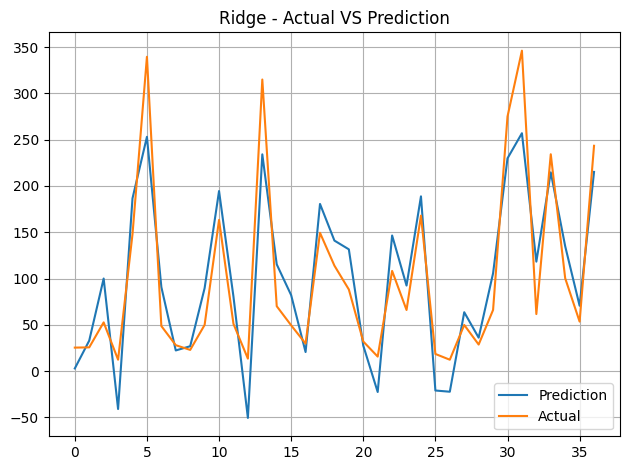

In [ ]:
# Visualizing Actual VS Prediction - Ridge
plot_actual_vs_pred(model = ridge, model_name = 'Ridge')

----observation----

Difference of actual and predicted values are quite high.

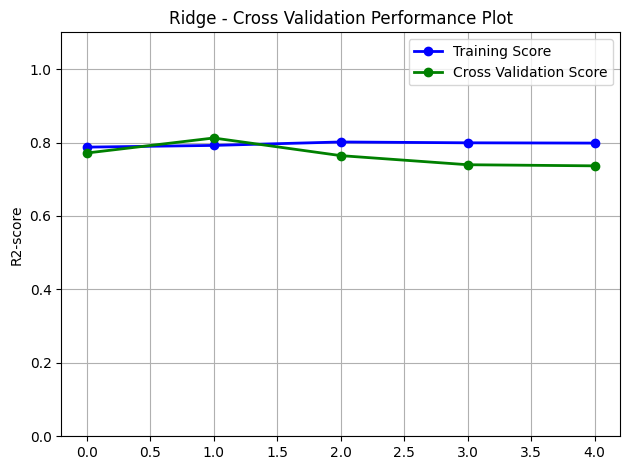


The CV test_Score : [0.77132798 0.81226501 0.7642757  0.73946375 0.73641601]
Mean cross-validation score : 0.7647496908504674



In [ ]:
# Ridge - Cross Validation r2-score and Performance Plot
plot_cv_perfomance(model = ridge, model_name = 'Ridge')

----observation----

Cross validation score 0.76.

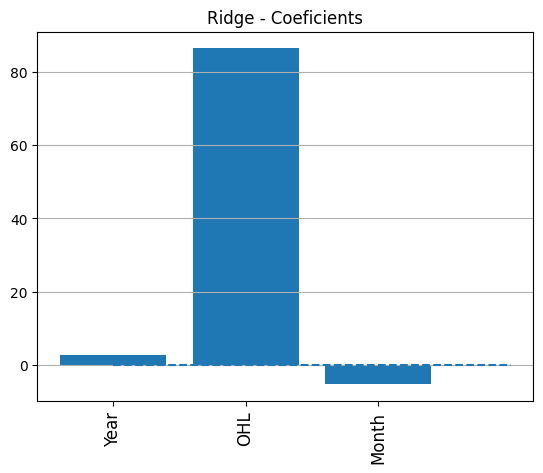

In [ ]:
# visualizing cofficients - Ridge
plot_coef(model = ridge, model_name = 'Ridge')

----observation----

No change observed here.

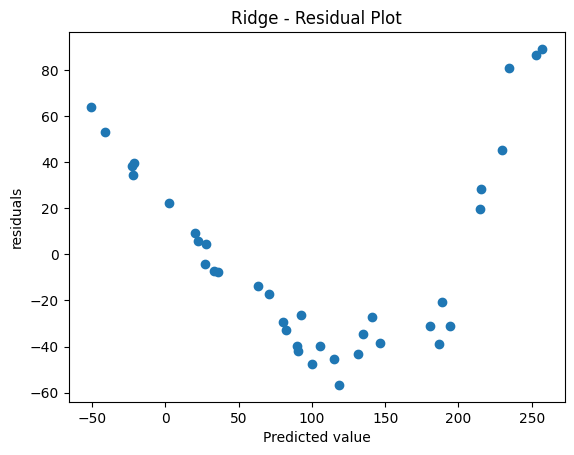

In [ ]:
# Check for homoscedasticity - Ridge
check_homoscedasticity(model = ridge, model_name = 'Ridge')

----observation----

Again we can observe same some U shaped pattern in residuals plot.

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV (Grid Search Cross-Validation). GridSearchCV systematically searches through a predefined grid of hyperparameters and evaluates each combination using cross-validation to determine the best set of hyperparameters for the model.
the best alpha value for the Ridge regression model was found using GridSearchCV. The reason for choosing GridSearchCV is its effectiveness in exhaustively searching through the hyperparameter space to identify the optimal combination that yields the best model performance. By leveraging cross-validation, GridSearchCV provides a robust evaluation of each hyperparameter combination while preventing overfitting and ensuring generalizability. Therefore, GridSearchCV is a popular choice for hyperparameter tuning when optimizing model performance is paramount.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

No, Random Forest performed better compared to Ridge Regression.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3
##Lasso Implimentation

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model
# Lasso Implementation
lasso = Lasso()

# Fit the Algorithm
lasso.fit(x_train, y_train)

print(f'Training Score : {lasso.score(x_train,y_train)}')
print(f'Testing Score : {lasso.score(x_test,y_test)}')


Training Score : 0.8122711431380257
Testing Score : 0.8232189346616547


----observation----

Testing Score improved by 2 percent after implementing Lasso.
Lasso is performing better than Ridge.

In [ ]:
# evaluation metrics - LinearRegression
update_e_metrics_df(model = lasso, model_name = 'Lasso' )

,metrics,Randomforest,Optimal_RandmForest,Ridge,Lasso
0,R2_score,0.987,0.987,0.820,0.823
1,adjusted_r2,0.986,0.986,0.804,0.807
2,MSE,118.919,123.556,1670.759,1636.877
3,RMSE,10.905,11.116,40.875,40.458
4,MAPE,0.092,0.097,0.787,0.764
5,MAE,7.488,7.758,35.002,34.487


#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
# Lasso Implementation with GridSearch CV hyperparameter optimization technique
parameters = {'alpha': np.arange(-100,100,0.1)}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=tscv)

# Fit the Algorithm
lasso_regressor.fit(x_train, y_train)
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)

The best fit alpha value is found out to be : {'alpha': 2.1999999999941906}


In [ ]:
# Implementing lasso again with best alpha value which is found by the GridSearch CV
lasso = Lasso(2.1999999999941906)

# Fit the Algorithm
lasso.fit(x_train, y_train)

print(f'Training Score : {lasso.score(x_train,y_train)}')
print(f'Testing Score : {lasso.score(x_test,y_test)}')

Training Score : 0.8114229064414892
Testing Score : 0.8268640283222983


----observation----

Testing Score improved even more after implementing Lasso with GridSearchCV parameter tunning.
Lasso is definitly performing better than Ridge here.
but also making model litle bit like under fit as testing score is more than training.

In [ ]:
# evaluation metrics - Lasso Model
update_e_metrics_df(model = lasso, model_name = 'Lasso_optimal' )

,metrics,Randomforest,Optimal_RandmForest,Ridge,Lasso,Lasso_optimal
0,R2_score,0.987,0.987,0.820,0.823,0.827
1,adjusted_r2,0.986,0.986,0.804,0.807,0.811
2,MSE,118.919,123.556,1670.759,1636.877,1603.126
3,RMSE,10.905,11.116,40.875,40.458,40.039
4,MAPE,0.092,0.097,0.787,0.764,0.735
5,MAE,7.488,7.758,35.002,34.487,33.861


----observation----

Metric chart has been improved aftere Lasso implementation.
R2-score and Adjusted-R2 both increased around 7 and 10 percent respectively.
Also MSE and MAE are decreased.

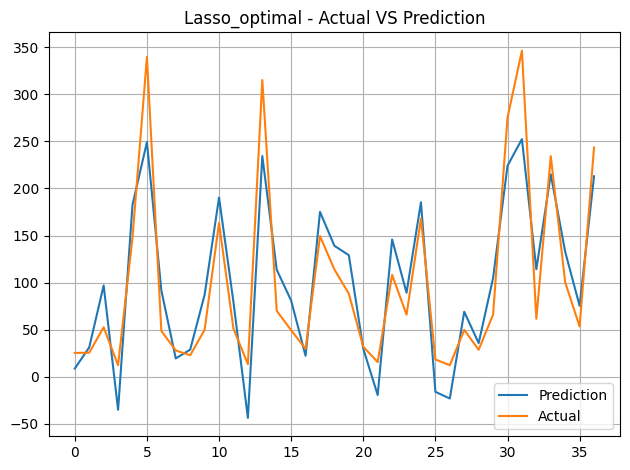

In [ ]:
# Visualizing Actual VS Prediction - Lasso
plot_actual_vs_pred(model = lasso, model_name = 'Lasso_optimal')

----observation----

performing better than ridge model.

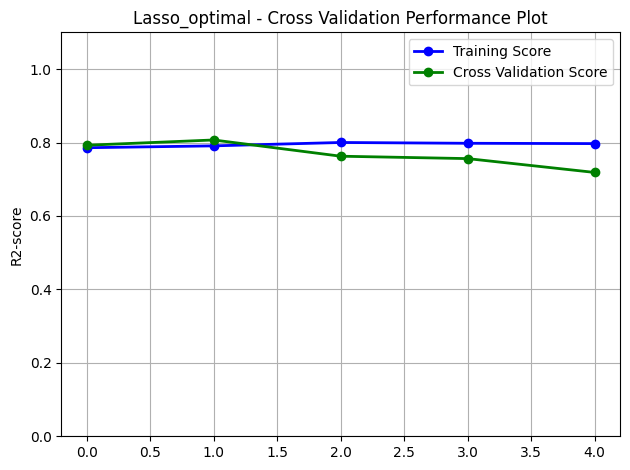


The CV test_Score : [0.79252278 0.8068927  0.76267162 0.75614103 0.71848779]
Mean cross-validation score : 0.7673431822634877



In [ ]:
#  Lasso - Cross Validation r2-score and Performance Plot
plot_cv_perfomance(model = lasso, model_name = 'Lasso_optimal')

---observation----

Lasso is performing much better in cross-validation than ridge model.

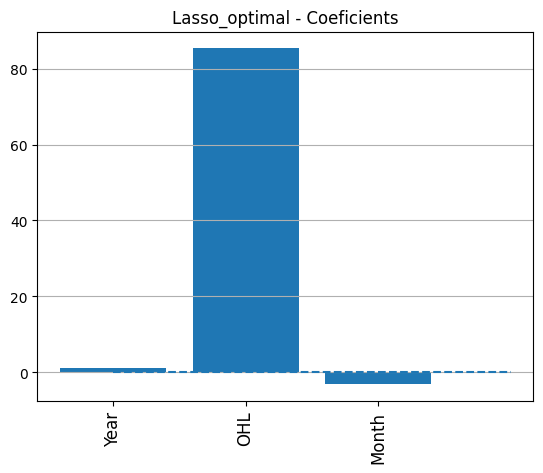

In [ ]:
# visualizing cofficients - Lasso
plot_coef(model = lasso, model_name = 'Lasso_optimal')

In [ ]:
# lasso coeficients
lasso.coef_

array([ 1.21241459, 85.28088689, -3.1765469 ])

----observation----

All the variable's coeficients become 0 except OHL variable.

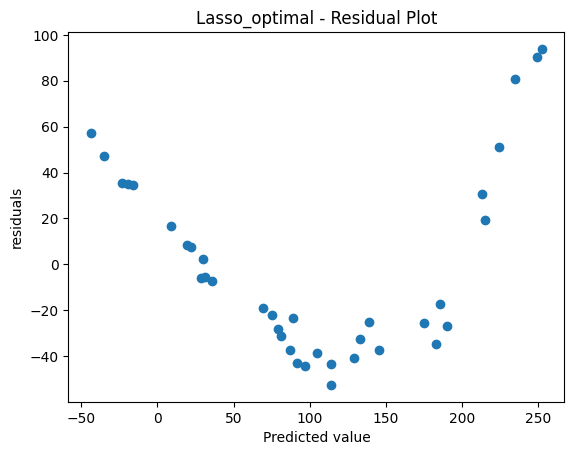

In [ ]:
# Check for homoscedasticity - Lasso
check_homoscedasticity(model = lasso, model_name = 'Lasso_optimal')

----observation----

Not much change here in residual plot.
we can observe same some like U shaped pattern in residuals plot again.

In [ ]:
# evaluation metrics chart
e_metrics_df

,metrics,Randomforest,Optimal_RandmForest,Ridge,Lasso,Lasso_optimal
0,R2_score,0.987,0.987,0.820,0.823,0.827
1,adjusted_r2,0.986,0.986,0.804,0.807,0.811
2,MSE,118.919,123.556,1670.759,1636.877,1603.126
3,RMSE,10.905,11.116,40.875,40.458,40.039
4,MAPE,0.092,0.097,0.787,0.764,0.735
5,MAE,7.488,7.758,35.002,34.487,33.861


----observation----

Metric chart has been improved aftere Lasso implementation.
R2-score and Adjusted-R2 both increased around 7 and 10 percent respectively.
Also MSE and MAE are decreased.

##### Which hyperparameter optimization technique have you used and why?

 GridSearchCV systematically searches through a predefined grid of hyperparameters and evaluates each combination using cross-validation to determine the best set of hyperparameters for the model, the best alpha value for the Lasso regression model was found using GridSearchCV. The reason for choosing GridSearchCV is its effectiveness in exhaustively searching through the hyperparameter space to identify the optimal combination that yields the best model performance. By leveraging cross-validation, GridSearchCV provides a robust evaluation of each hyperparameter combination while preventing overfitting and ensuring generalizability. Therefore, GridSearchCV is a popular choice for hyperparameter tuning when optimizing model performance is paramount.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes, the optimal Lasso regression model demonstrates improvements across all evaluation metrics, indicating enhanced model performance and predictive accuracy compared to both the Ridge and non-optimized Lasso models.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

The evaluation metrics that would be most impactful for business decisions are R2 score, adjusted R2, MSE, RMSE, and MAPE. These metrics provide insights into the overall performance and accuracy of the predictive models, enabling businesses to make informed decisions and optimize their strategies effectively.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

In [ ]:
best_model= rf

In [ ]:
best_model.fit(x_train,y_train) # fit a data into model

RandomForestRegressor(random_state=1)

 The Optimal random forest regressor model stands out as the most favorable choice for the final prediction model. It achieves the highest R2 score and lowest RMSE, indicating the best balance between model fit and predictive accuracy. Additionally, it demonstrates lower MAPE compared to other models, further supporting its superior predictive performance. Therefore, the Optimal Lasso model would be chosen as the final prediction model.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

SHAP (SHapley Additive exPlanations) is a model explainability tool used to provide insights into the predictions made by machine learning models. It works by calculating the contribution of each feature to the model's prediction. By leveraging concepts from game theory, SHAP helps users understand why a model made a particular prediction by breaking down the impact of individual features. It can be applied to any machine learning model, making it a versatile tool for model interpretation and explanation.

In [ ]:
!pip install shap
import shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 3.5 MB/s eta 0:00:00


In [ ]:
explainer = shap.KernelExplainer(best_model.predict, x_train)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import joblib
joblib.dump(best_model, 'best_model.joblib') # saving best model in joblib file

['best_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
# Load the File and predict unseen data.
model = joblib.load('best_model.joblib')

model.predict(x_test)

array([ 25.5734,  28.7267,  58.0463,  14.4449, 172.243 , 349.9413,
        57.7944,  24.6207,  28.8663,  53.1804, 175.6144,  57.6328,
        13.469 , 293.4364,  71.6993,  56.4302,  26.713 , 145.1991,
        95.7819,  84.8494,  29.5687,  17.4717, 108.0741,  55.3669,
       172.9162,  18.2288,  15.0703,  49.8654,  29.9427,  69.822 ,
       240.4118, 355.0145,  76.4855, 243.2928,  88.9188,  52.1081,
       219.8888])

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Let's review the progress and outcomes of our project:
1. In this project, I aimed to predict monthly stock closing prices. Here's what I did:

* Imported libraries and loaded the dataset.
* Explored the data (EDA) and identified outliers.
* Manipulated the data and conducted hypothesis testing.
* Engineered features and preprocessed the data.
* Implemented machine learning models and recorded evaluation metrics.
* Interpreted model predictions using SHAP.

2. Machine Learning model used:
* Random Forest
* Ridge Regression
* Lasso Regression

3. Here are the important instances and observations we discovered after analyzing the Yes Bank's stock price dataset:

* The dataset contains no missing values or outliers.
Stock prices reached their peak in 2017 and 2018.
* The all-time high price was 404, recorded in 2018.
* The all-time low price was 5.55, observed in 2020.
* From 2016 to 2018, the price increased at a high rate.
* After 2018, the price experienced a significant decrease.
* The price continued to decrease in 2019 and 2020.
* All open, high, low, and close prices exhibit positively skewed distributions.
* There is a strong correlation between open, high, low, and close prices.
* Open, high, and low prices show a strong linear relationship with the dependent variable.

4. Observation:
* The initial model chosen was Random Forest, which yielded decent training and testing scores. It exhibited low values for MSE and MAE metrics.

* Following this, Ridge Regression was implemented, but its performance fell short compared to Random Forest. The model didn't achieve desirable outcomes.

* Lastly, Lasso Regression was introduced, surpassing Ridge Regression in terms of performance. It exhibited lower MSE, RMSE, and MAE values, indicating superior predictive capability.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***